In [1]:
library(TSA)
library(mgcv)
install.packages("nbconvertR")
library(nbconvertR)
library(ggplot2)


Attaching package: 'TSA'

The following objects are masked from 'package:stats':

    acf, arima

The following object is masked from 'package:utils':

    tar

Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.
Installing package into 'C:/Users/bbalamdari/OneDrive - Ecolab/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'nbconvertR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bbalamdari\AppData\Local\Temp\Rtmpicgr89\downloaded_packages


Warning message:
"package 'nbconvertR' was built under R version 3.6.2"Warning message:
"package 'ggplot2' was built under R version 3.6.2"

In [19]:
data=read.csv("Moose.csv",header=T)       #Read in data#
names(data)=c("year", "fairbanksPop", "mooseHarvest", "totalMoose", "avgSnow", "wolfPop") #Name Columns#
head(data, n=5)

year,fairbanksPop,mooseHarvest,totalMoose,avgSnow,wolfPop,NA
1965,50043,335,23300,25,200,1
1966,52805,216,17200,28,215,1
1967,53037,299,14300,23,230,1
1968,52968,377,13000,36,250,1
1969,49416,376,12400,20,270,1


In [20]:
years=data[,"year"] 
ts_fairbanksPop=ts(data[,"fairbanksPop"],start=1965, freq=1)
ts_mooseHarvest=ts(data[,"mooseHarvest"],start=1965, freq=1)
ts_totalMoose=ts(data[,"totalMoose"],start=1965, freq=1)
ts_avgSnow=ts(data[,"avgSnow"],start=1965, freq=1)
ts_wolfPop=ts(data[,"wolfPop"],start=1965, freq=1)

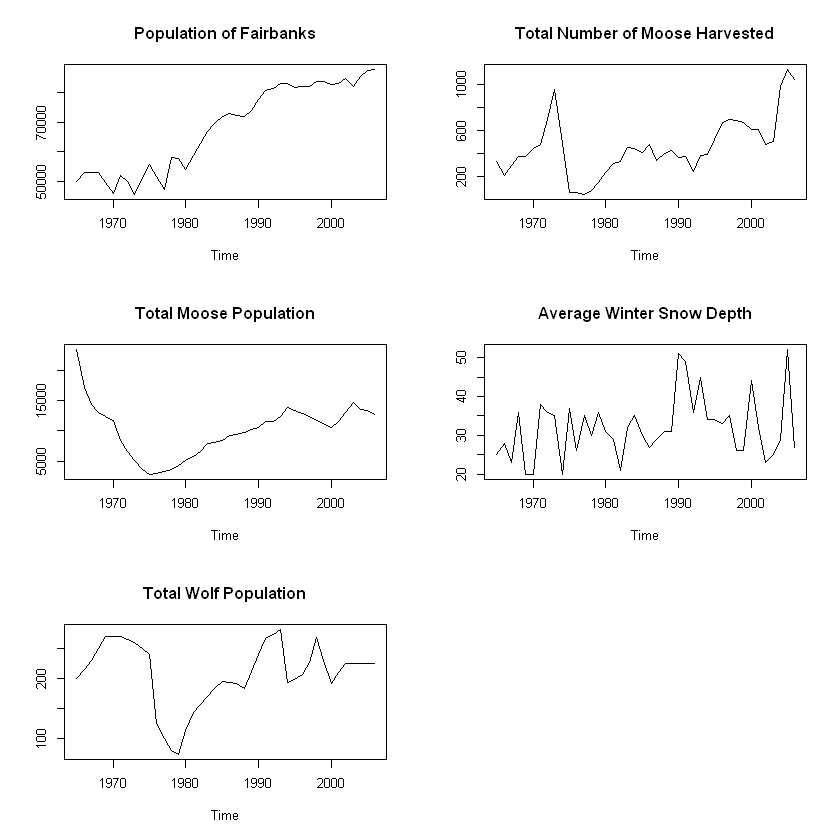

In [21]:
#Plots the 6 ts#
par(mfrow=c(3,2))
plot(ts_fairbanksPop, type="l", main=paste("Population of Fairbanks"),ylab="")
plot(ts_mooseHarvest, type="l", main=paste("Total Number of Moose Harvested"),ylab="")
plot(ts_totalMoose, type="l", main=paste("Total Moose Population"),ylab="")
plot(ts_avgSnow, type="l", main=paste("Average Winter Snow Depth"),ylab="")
plot(ts_wolfPop, type="l", main=paste("Total Wolf Population"),ylab="")

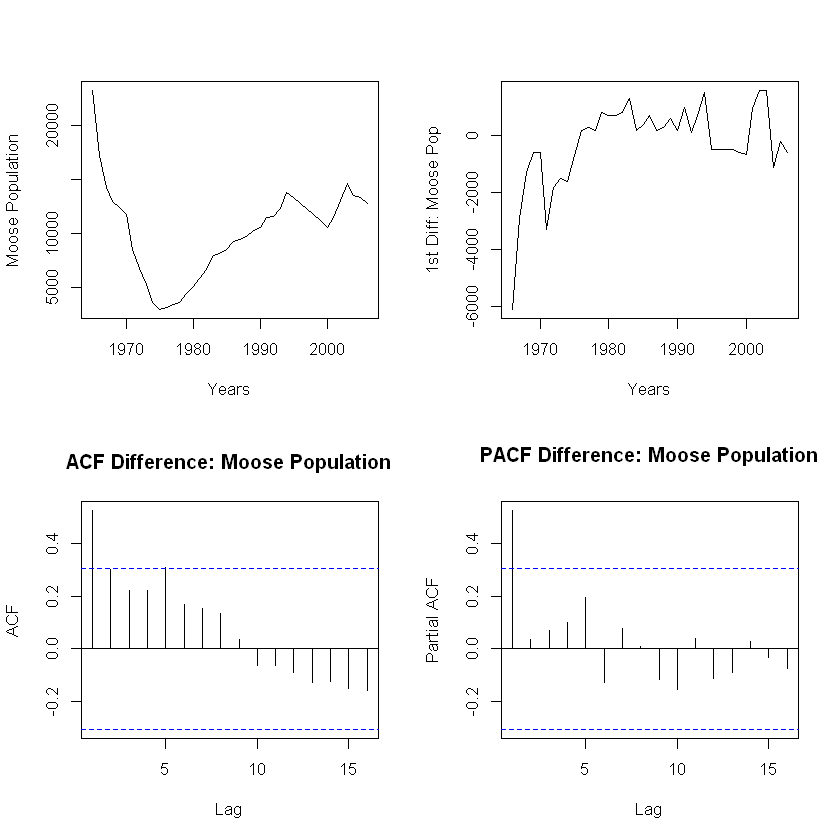

In [22]:
##Total Moose Population##
par(mfrow=c(2,2))
plot(ts_totalMoose,xlab="Years",ylab="Moose Population",type="l")
plot(diff(ts_totalMoose),xlab="Years",ylab="1st Diff: Moose Pop",type="l")
acf(diff(ts_totalMoose),main="ACF Difference: Moose Population")
pacf(diff(ts_totalMoose),main="PACF Difference: Moose Population")

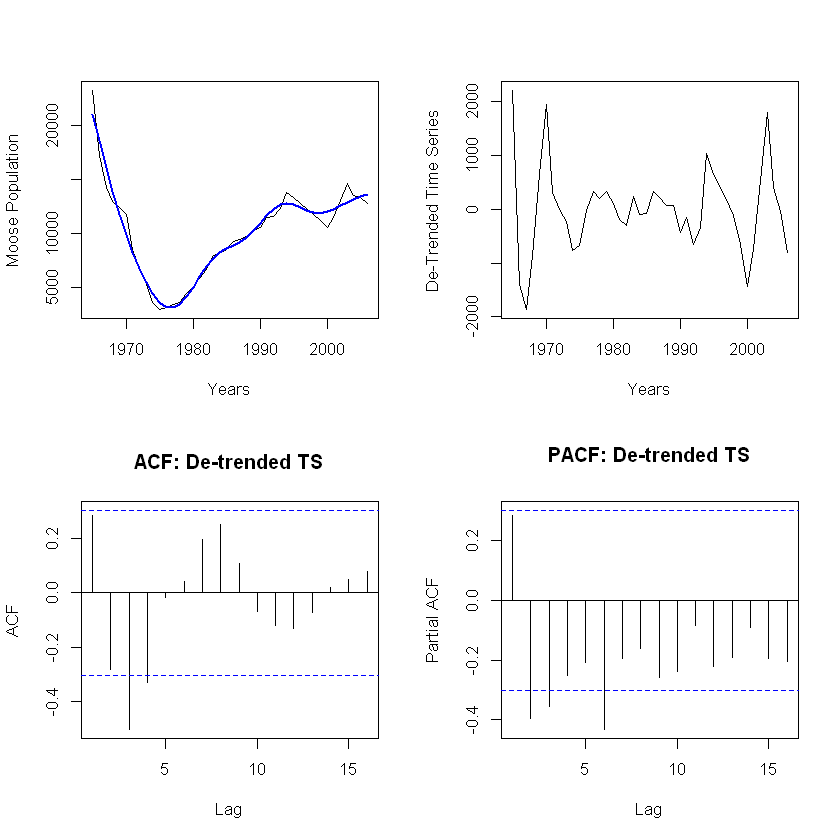

In [23]:
############# APROACH 1: Remove Trend+ARMA ###############################
## Fit Trend 
totalMoose = data[,"totalMoose"]
time.pts = c(1:length(totalMoose))
time.pts = c(time.pts - min(time.pts))/max(time.pts)
gam.fit.tr = gam(totalMoose~s(time.pts))
moose.fit.gam = fitted(gam.fit.tr)
moose.fit.gam = ts(moose.fit.gam,start=1965, freq=1)
resid.process = totalMoose-moose.fit.gam
resid.process = ts(resid.process,start=1965, freq=1)
par(mfrow=c(2,2))
plot(ts_totalMoose,xlab="Years",ylab="Moose Population",type="l")
lines(moose.fit.gam,lwd=2,col="blue")
plot(resid.process,xlab="Years",ylab="De-Trended Time Series",type="l")
acf(resid.process,main="ACF: De-trended TS")
pacf(resid.process,main="PACF: De-trended TS")

In [27]:
par(mfrow=c(2,2))

test_modelA <- function(p,d,q){
  model = arima(resid.process, order=c(p,d,q), method="ML")
  current.aic = AIC(model)
  df = data.frame(p,d,q,current.aic)
  names(df) <- c("p","d","q","AIC")
  print(paste(p,d,q,current.aic,sep=" "))
  return(df)
}

orders = data.frame(Inf,Inf,Inf,Inf)
names(orders) <- c("p","d","q","AIC")


for (p in 0:3){
  for (d in 0:1){
    for (q in 0:3) {
      possibleError <- tryCatch(
        orders<-rbind(orders,test_modelA(p,d,q)),
        error=function(e) e
      )
      if(inherits(possibleError, "error")) next
      
    }
  }
}
orders <- orders[order(-orders$AIC),]
tail(orders)

[1] "0 0 0 684.527836458548"
[1] "0 0 1 674.975562245386"
[1] "0 0 2 665.755155141709"
[1] "0 0 3 663.837492390139"
[1] "0 1 0 675.596503552581"
[1] "0 1 1 674.881951428565"
[1] "0 1 2 662.671866914791"
[1] "0 1 3 657.859297327067"
[1] "1 0 0 682.109504438664"
[1] "1 0 1 676.738512030362"
[1] "1 0 2 664.854383378204"
[1] "1 0 3 665.780175356101"
[1] "1 1 0 676.244106445894"
[1] "1 1 1 675.61139476966"


Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"

[1] "1 1 2 664.578143816969"
[1] "1 1 3 656.117008342224"
[1] "2 0 0 665.306397636671"


Warning message in log(s2):
"NaNs produced"

[1] "2 0 1 648.988625071311"
[1] "2 0 2 648.663563626876"
[1] "2 0 3 646.980602660006"
[1] "2 1 0 673.130281085334"
[1] "2 1 1 654.387651372527"
[1] "2 1 2 642.061715926219"
[1] "2 1 3 643.926880213572"
[1] "3 0 0 661.538903712262"
[1] "3 0 1 650.697616477581"
[1] "3 0 2 652.250977921688"
[1] "3 0 3 648.522538158906"
[1] "3 1 0 667.56945134111"
[1] "3 1 1 651.352089014324"
[1] "3 1 2 643.968365875192"
[1] "3 1 3 645.172050935812"


,p,d,q,AIC
29,3,0,3,648.5225
21,2,0,3,646.9806
33,3,1,3,645.1721
32,3,1,2,643.9684
25,2,1,3,643.9269
24,2,1,2,642.0617


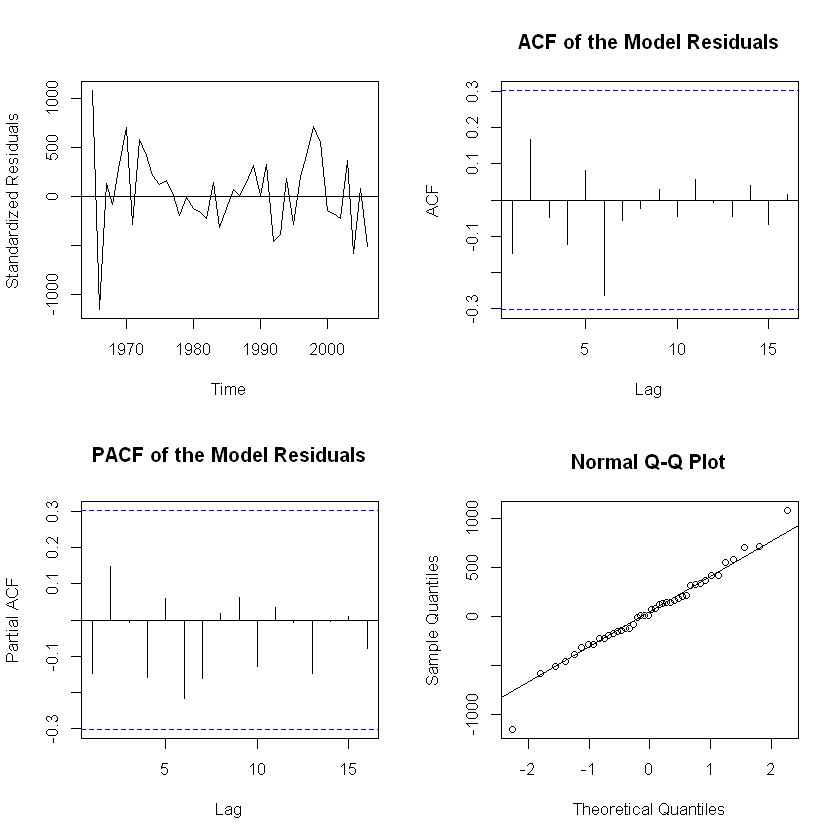

In [28]:
porder=2
qorder=3
## Fit ARMA Model
final_model.1 = arima(resid.process, order = c(porder,0,qorder), method='ML')
resids.1 = resid(final_model.1)
## Residual Analysis
par (mfrow=c(2,2))
plot(resids.1, ylab='Standardized Residuals')
abline(h=0)
acf(resids.1,main= 'ACF of the Model Residuals')
pacf(resids.1,main='PACF of the Model Residuals')
qqnorm(resids.1)
qqline(resids.1)


In [29]:
## Test for Independence for final model
Box.test(resids.1, lag = (porder+qorder+1), type = "Box-Pierce", fitdf = (porder+qorder))
Box.test(resids.1, lag = (porder+qorder+1), type = "Ljung-Box", fitdf = (porder+qorder))



	Box-Pierce test

data:  resids.1
X-squared = 6.0056, df = 1, p-value = 0.01426



	Box-Ljung test

data:  resids.1
X-squared = 7.0022, df = 1, p-value = 0.008141


In [30]:
## Forecasting Trend+ARMA: 4 years ahead
n = length(resid.process)
nfit = n-4

## Predict trend
train.totalMoose= totalMoose[1:nfit]
x = time.pts[1:nfit]
gam.fit.tr.4 = gam(train.totalMoose~s(x))
newdata = data.frame(x=time.pts[(nfit+1):n])
gam.pred= predict(gam.fit.tr.4,newdata = newdata,interval=c("prediction"))

In [31]:
## Predict ARMA
resid.process.4 = totalMoose[1:nfit]-fitted(gam.fit.tr.4)
resid.process = ts(resid.process.4,start=1965, freq=1)
outresid = arima(resid.process.4, order = c(porder,0,qorder),method = "ML")
outpredresid = predict(outresid,n.ahead=4)$pred

final.pred.1 = outpredresid+gam.pred

In [ ]:
**************************************** APROACH 2: ARIMA ******************************

In [32]:
par(mfrow=c(2,2))

test_modelA <- function(p,d,q){
  model = arima(ts_totalMoose, order=c(p,d,q), method="ML")
  current.aic = AIC(model)
  df = data.frame(p,d,q,current.aic)
  names(df) <- c("p","d","q","AIC")
  print(paste(p,d,q,current.aic,sep=" "))
  return(df)
}

orders = data.frame(Inf,Inf,Inf,Inf)
names(orders) <- c("p","d","q","AIC")


for (p in 0:3){
  for (d in 0:1){
    for (q in 0:3) {
      possibleError <- tryCatch(
        orders<-rbind(orders,test_modelA(p,d,q)),
        error=function(e) e
      )
      if(inherits(possibleError, "error")) next
      
    }
  }
}
orders <- orders[order(-orders$AIC),]
tail(orders)

[1] "0 0 0 823.920545415854"
[1] "0 0 1 781.318427041168"
[1] "0 0 2 757.907254908258"
[1] "0 0 3 737.461274014678"
[1] "0 1 0 715.1111109575"
[1] "0 1 1 699.715462656046"
[1] "0 1 2 698.57917931458"
[1] "0 1 3 695.679891477738"
[1] "1 0 0 736.50351766221"
[1] "1 0 1 723.673647184176"
[1] "1 0 2 722.619494444263"
[1] "1 0 3 719.629759228091"
[1] "1 1 0 691.640530087493"
[1] "1 1 1 693.633456582007"
[1] "1 1 2 695.279396155435"
[1] "1 1 3 697.098810574743"


Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"

[1] "2 0 1 714.033425899627"
[1] "2 0 2 718.321004296252"
[1] "2 0 3 721.053389903651"
[1] "2 1 0 693.634312590956"
[1] "2 1 1 694.769488408278"
[1] "2 1 2 696.470674688872"
[1] "2 1 3 698.449773628193"
[1] "3 0 0 717.75243633145"
[1] "3 0 1 718.856019600184"
[1] "3 0 2 720.479048618954"


Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"

[1] "3 0 3 721.647594025348"
[1] "3 1 0 695.554795639648"
[1] "3 1 1 696.41771215142"
[1] "3 1 2 695.468336090491"
[1] "3 1 3 697.464989810726"


,p,d,q,AIC
31,3,1,2,695.4683
16,1,1,2,695.2794
22,2,1,1,694.7695
21,2,1,0,693.6343
15,1,1,1,693.6335
14,1,1,0,691.6405


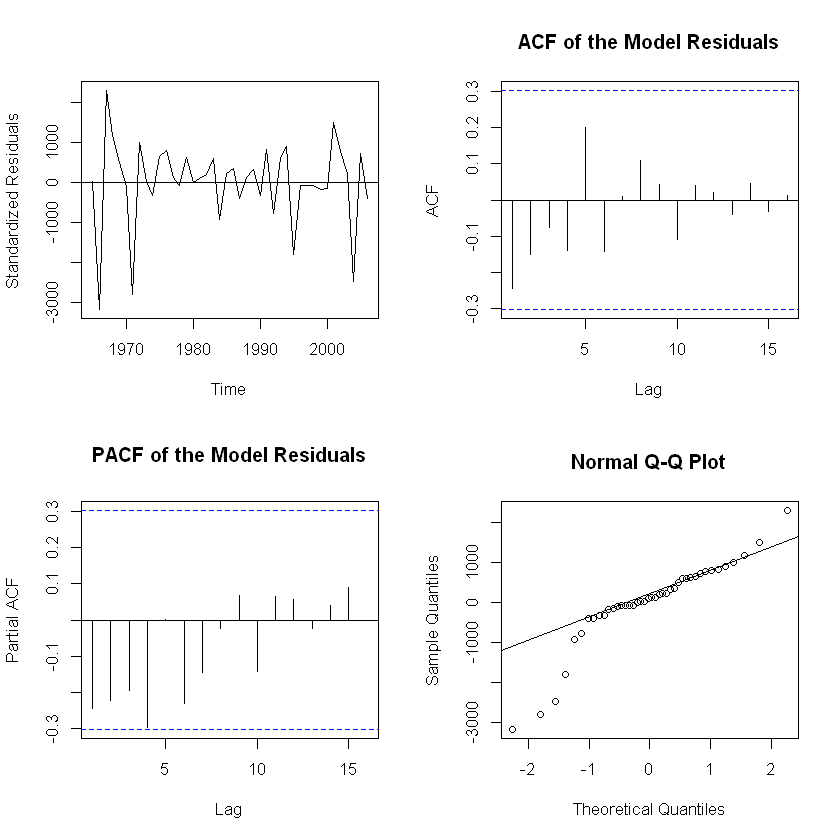

In [33]:
porder=1
qorder=0

final_model.2 = arima(ts_totalMoose, order = c(porder,1,qorder), method = "ML")
resids.2 = resid(final_model.2)
## Residual Analysis
par (mfrow=c(2,2))
plot(resids.2, ylab='Standardized Residuals')
abline(h=0)
acf(resids.2,main= 'ACF of the Model Residuals')
pacf(resids.2,main='PACF of the Model Residuals')
qqnorm(resids.2)
qqline(resids.2)

In [34]:
## Test for Independence for final model
Box.test(resids.2, lag = (porder+qorder+1), type = "Box-Pierce", fitdf = (porder+qorder))
Box.test(resids.2, lag = (porder+qorder+1), type = "Ljung-Box", fitdf = (porder+qorder))



	Box-Pierce test

data:  resids.2
X-squared = 3.4275, df = 1, p-value = 0.06412



	Box-Ljung test

data:  resids.2
X-squared = 3.7033, df = 1, p-value = 0.0543


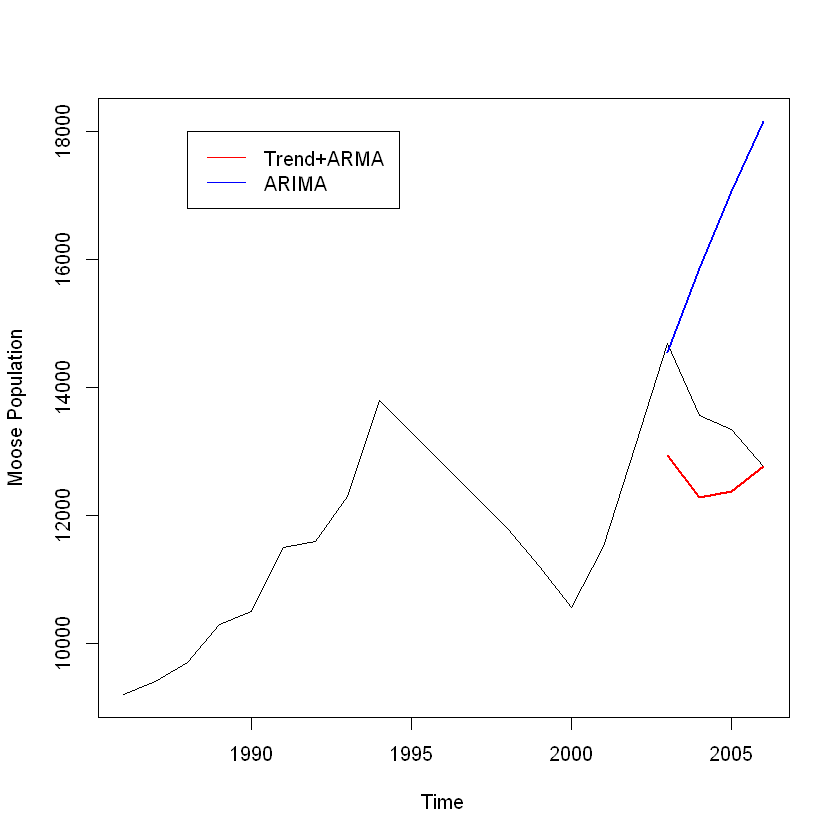

In [42]:
## Forecasting with ARIMA 
## 4 Years Ahead: 
outtotal = arima(ts_totalMoose[1:nfit], order = c(porder,1,qorder),method = "ML")
final.pred.2 = predict(outtotal,n.ahead=4)$pred

ymin = min(c(ts_totalMoose[(n-20):n],final.pred.1,final.pred.2))
ymax = max(c(ts_totalMoose[(n-20):n],final.pred.1,final.pred.2))
plot(years[(n-20):n], ts_totalMoose[(n-20):n],type="l", ylim=c(ymin,ymax), xlab="Time", ylab="Moose Population")
lines(years[(nfit+1):n],final.pred.1,col="red",lwd=2)
lines(years[(nfit+1):n],final.pred.2,col="blue",lwd=2)
legend(1988,18000,legend=c("Trend+ARMA","ARIMA"),col=c("red","blue"),lty=1)
